In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error

In [2]:
import data_preprocessing

energy_consumption_data_train, energy_consumption_data_test = data_preprocessing.preprocess_data("Energy Consumption Dataset.csv")

energy_consumption_data_train.head()

,Wind Velocity for Station 02014,Sun Duration for Station 02014,Air Temperature for Station 02014,Precipitation Amount for Station 02014,Wind Velocity for Station 03987,Sun Duration for Station 03987,Air Temperature for Station 03987,Precipitation Amount for Station 03987,Wind Velocity for Station 03379,Sun Duration for Station 03379,Air Temperature for Station 03379,Precipitation Amount for Station 03379,Wind Velocity for Station 04928,Sun Duration for Station 04928,Air Temperature for Station 04928,Precipitation Amount for Station 04928,Quarter,Month,Energy Consumption
2015-02-20 10:00:00,0.469072,0.033333,0.408425,0.0,0.260638,0.000000,0.283465,0.0,0.141975,1.0,0.458498,0.0,0.291925,1.0,0.357285,0.0,1,2,42923.00
2015-02-20 11:00:00,0.371134,0.733333,0.434066,0.0,0.239362,0.683333,0.364173,0.0,0.129630,1.0,0.494071,0.0,0.260870,1.0,0.423154,0.0,1,2,40497.00
2015-02-20 12:00:00,0.350515,0.016667,0.454212,0.0,0.308511,1.000000,0.405512,0.0,0.203704,1.0,0.509881,0.0,0.260870,1.0,0.489022,0.0,1,2,40872.00
2015-02-20 13:00:00,0.412371,0.050000,0.459707,0.0,0.345745,1.000000,0.427165,0.0,0.148148,1.0,0.521739,0.0,0.254658,1.0,0.504990,0.0,1,2,42470.75
2015-02-20 14:00:00,0.319588,0.016667,0.459707,0.0,0.265957,0.766667,0.437008,0.0,0.080247,1.0,0.537549,0.0,0.416149,1.0,0.508982,0.0,1,2,46082.25


In [4]:
gridParams = {
    'max_depth': range(1, 32),
    # 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))




Best Parameters:  {'max_depth': 6}
Best Estimator:  DecisionTreeRegressor(max_depth=6, random_state=42)
Best Score (MSE):  -114121682.50615077
RMSE:  11564.649679926288
NRMSE:  17.075642559617116 %)
R2 Score:  0.19877900694784545


In [22]:
gridParams = {
    # 'max_depth': range(1, 32),
    'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05],
    # 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))


Best Parameters:  {'min_samples_leaf': 0.01}
Best Estimator:  DecisionTreeRegressor(min_samples_leaf=0.01, random_state=42)
Best Score (MSE):  -111917179.88479209
RMSE:  11509.387233087547
NRMSE:  0.16994045467158178
R2 Score:  0.20641808680423634


In [13]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Babett\anaconda3\Lib\site-pack

Best Parameters:  {'min_samples_split': 0.05}
Best Estimator:  DecisionTreeRegressor(min_samples_split=0.05, random_state=42)
Best Score (MSE):  -113878868.57967755
RMSE:  11530.522408958872
NRMSE:  0.1702525235354055
R2 Score:  0.20350083448070566


In [15]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    'max_features': range(2,8),
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'max_features': 4}
Best Estimator:  DecisionTreeRegressor(max_features=4, random_state=42)
Best Score (MSE):  -207132756.66302478
RMSE:  14654.544521105858
NRMSE:  0.21637989134314528
R2 Score:  -0.2865658103406319


In [19]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ccp_alpha': [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, .14, .16, .18, .2],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'ccp_alpha': 0.1}
Best Estimator:  DecisionTreeRegressor(ccp_alpha=0.1, random_state=42)
Best Score (MSE):  -209361293.40053678
RMSE:  14812.907130964246
NRMSE:  0.21871817516115297
R2 Score:  -0.31452229667468923


In [26]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'max_leaf_nodes': range(30,70),
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'max_leaf_nodes': 44}
Best Estimator:  DecisionTreeRegressor(max_leaf_nodes=44, random_state=42)
Best Score (MSE):  -113481104.5115759
RMSE:  11484.048731656561
NRMSE:  0.16956632211641853
R2 Score:  0.20990846234720884


In [30]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_impurity_decrease': [0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, .62, .63, .64, .65, .66, .67, .68, .69, .7],
    # 'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'min_impurity_decrease': 0.66}
Best Estimator:  DecisionTreeRegressor(min_impurity_decrease=0.66, random_state=42)
Best Score (MSE):  -208700226.0287016
RMSE:  14898.88311698651
NRMSE:  0.21998764310584576
R2 Score:  -0.32982588740127694


In [34]:
gridParams = {
    # 'max_depth': range(1, 32),
    # 'min_samples_leaf': [0, 100, 200, 300, 400, 500],
    # 'min_samples_split': [0.0, 0.05, 0.1, 0.15, 0.2],
    # 'max_features': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    # 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    'min_weight_fraction_leaf': [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, .006, .007, .008, .009, .01, .011, .012, .013, .014, .015, .016, .017, .018, .019, .02] 
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))

Best Parameters:  {'min_weight_fraction_leaf': 0.01}
Best Estimator:  DecisionTreeRegressor(min_weight_fraction_leaf=0.01, random_state=42)
Best Score (MSE):  -111917179.88479209
RMSE:  11509.387233087547
NRMSE:  0.16994045467158178
R2 Score:  0.20641808680423634


c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
9720 fits failed out of a total of 29160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\Babett\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\Babett\anaconda3\Lib\si

Best Parameters:  {'ccp_alpha': 0.05, 'max_depth': 6, 'max_features': 10, 'max_leaf_nodes': 44, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 0.01, 'min_samples_split': 0.04, 'min_weight_fraction_leaf': 0.0}
Best Estimator:  DecisionTreeRegressor(ccp_alpha=0.05, max_depth=6, max_features=10,
                      max_leaf_nodes=44, min_samples_leaf=0.01,
                      min_samples_split=0.04, random_state=42)
Best Score (MSE):  -113865353.30346699
RMSE:  11565.346911806746
NRMSE:  0.1707667204885383
R2 Score:  0.19868239292577017
MAE:  9151.144120493602
MAPE:  38.7140542016948


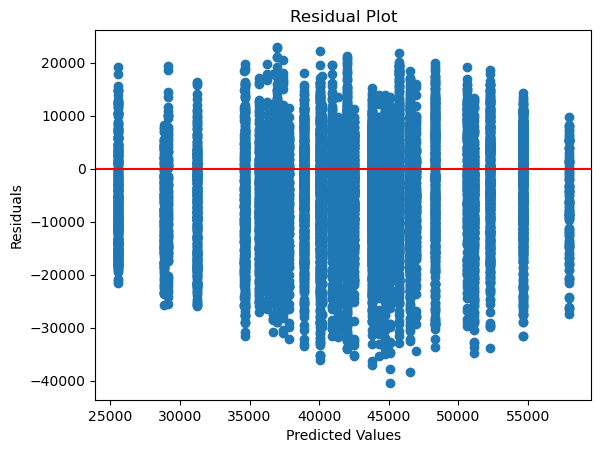

In [57]:
gridParams = {
    'max_depth': range(5,7),
    'min_samples_leaf': [0.0, 0.01, 0.02],
    'min_samples_split': [0.03, 0.04, 0.05],
    'max_features': [9,10,11],
    'ccp_alpha': [0.05, 0.1, 0.15],
    'max_leaf_nodes': range(44, 46),
    'min_impurity_decrease': [0.0, 0.25, 0.5],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.02] 
}

regressor = DecisionTreeRegressor(random_state=42)

X_TRAIN = energy_consumption_data_train[energy_consumption_data_train.columns[:-1]]
Y_TRAIN = energy_consumption_data_train['Energy Consumption']

gridSearch = GridSearchCV(regressor, gridParams, cv=10, n_jobs=-1, scoring='neg_mean_squared_error')
gridSearch.fit(X_TRAIN, Y_TRAIN)

X_TEST = energy_consumption_data_test[energy_consumption_data_test.columns[:-1]]
Y_TEST = energy_consumption_data_test['Energy Consumption']

bestRegressor = gridSearch.best_estimator_
bestRegressor.fit(X_TRAIN, Y_TRAIN)
Y_PRED = bestRegressor.predict(X_TEST)

print("Best Parameters: ", gridSearch.best_params_)
print("Best Estimator: ", gridSearch.best_estimator_)
print("Best Score (MSE): ", gridSearch.best_score_)
print("RMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)))
print("NRMSE: ", sqrt(mean_squared_error(Y_TEST, Y_PRED)) / (Y_TEST.max() - Y_TEST.min()))
print("R2 Score: ", r2_score(Y_TEST, Y_PRED))
print("MAE: ", mean_absolute_error(Y_TEST, Y_PRED))
print("MAPE: ", np.mean(np.abs((Y_TEST - Y_PRED) / Y_TEST)) * 100)
#print("Residuals: ", Y_TEST - Y_PRED)

plt.scatter(Y_PRED, Y_TEST - Y_PRED)
plt.axhline(y=0, color='r', linestyle='-')  # Add a horizontal line at y=0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()